# Evaluate, Feel Great

In [15]:
import params as p
import functions as f
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import warnings

In [8]:
warnings.simplefilter(action = 'ignore', category=FutureWarning)

### Import Data

In [9]:
# Load train, test and validation datasets
train, test, val = f.load_split_datasets(part = '03')

In [10]:
# Split datasets into X and y components
X_train, y_train = f.split_data_X_y(train)
X_test, y_test = f.split_data_X_y(test)
X_val, y_val = f.split_data_X_y(val)

In [11]:
# Define train/test/validation dictionaries to make fitting and evaluation arguments cleaner
train_data = {'X' : X_train, 'y' : y_train}
test_data = {'X' : X_test, 'y' : y_test}
val_data = {'X' : X_val, 'y' : y_val}

### Import Models

In [12]:
baseline, xgb, rf = f.load_models()
models = [baseline, xgb, rf ]

### Evaluate Final, Tuned Models on validation data

In [13]:
tuned_rmse = {
    'R2 Train' : [f.evaluate_model(model, metric = 'r2', **train_data) for model in models],
    'R2 Test' : [f.evaluate_model(model, metric = 'r2', **test_data) for model in models],
    'R2 Validation' : [f.evaluate_model(model, metric = 'r2', **val_data) for model in models]
    }
    
pd_rmse = pd.DataFrame(tuned_rmse, index = ['Linear Regression (Baseline)', 'Tuned XGBoost', 'Tuned RandomForest'])
pd_rmse

,R2 Train,R2 Test,R2 Validation
Linear Regression (Baseline),0.567670,0.551524,0.537439
Tuned XGBoost,0.890772,0.865678,0.863921
Tuned RandomForest,0.849384,0.806394,0.822839


Looking at these R2 scores, it looks like the Tuned XGBoost model is the appropriate model for this problem due to it having the highest validation R2 score, close train and test R2 scores suggesting minimal over fitting, and high R2 scores in general for each dataset.

#### Make Plot to show Residuals for each model

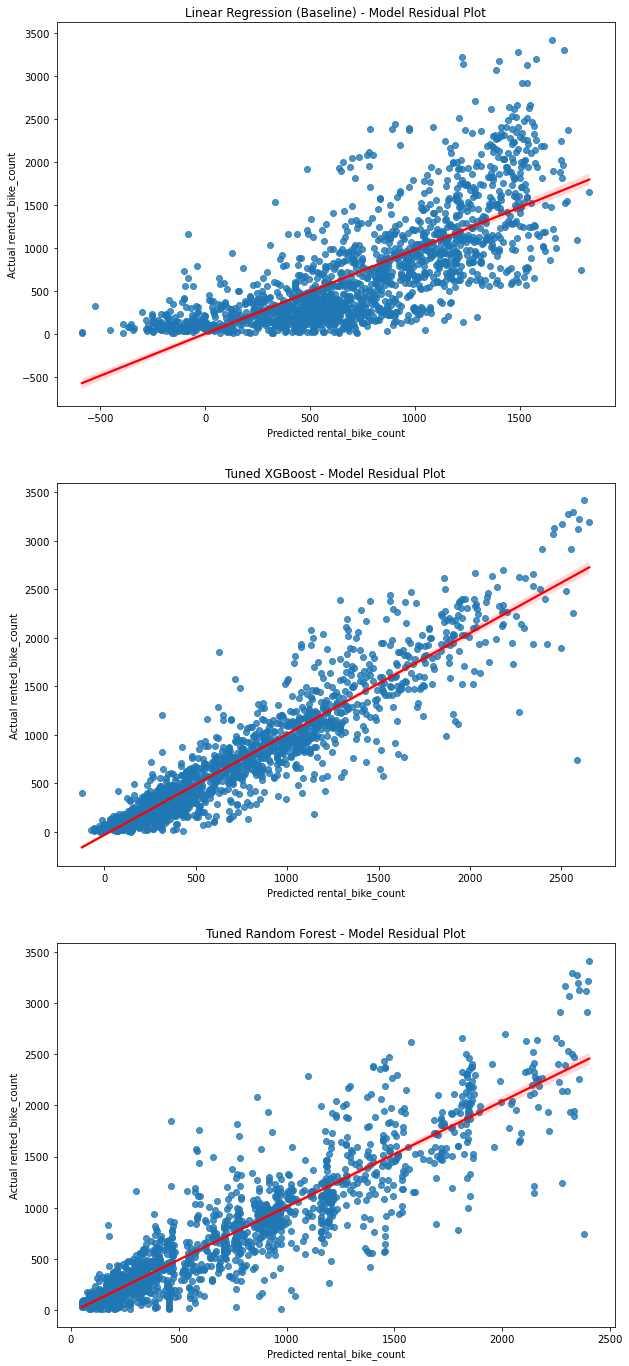

In [16]:
def make_residual_plot():

    fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize=(10, 24))

    for idx, model_info in enumerate([('Linear Regression (Baseline)', baseline), ('Tuned XGBoost', xgb), ('Tuned Random Forest', rf)]):

        model_name = model_info[0]
        model = model_info[1]

        sns.regplot(
            ax = ax[idx],
            x = model.predict(X_val),
            y = y_val,
            line_kws = {'color' : 'r'},
        ).set(title = f'{model_name} - Model Residual Plot', ylabel = 'Actual rented_bike_count', xlabel = 'Predicted rental_bike_count')

    plt.savefig(p.OUTPUTS_PATH + 'residuals1.png')
    plt.show()

make_residual_plot()

As we can from the residual plots above, the Tuned XGBoost model has residuals closest to the y = 0 line. It looks like the residuals are larger at the extremities.... unexplained variance.

### Plot Histogram of Results

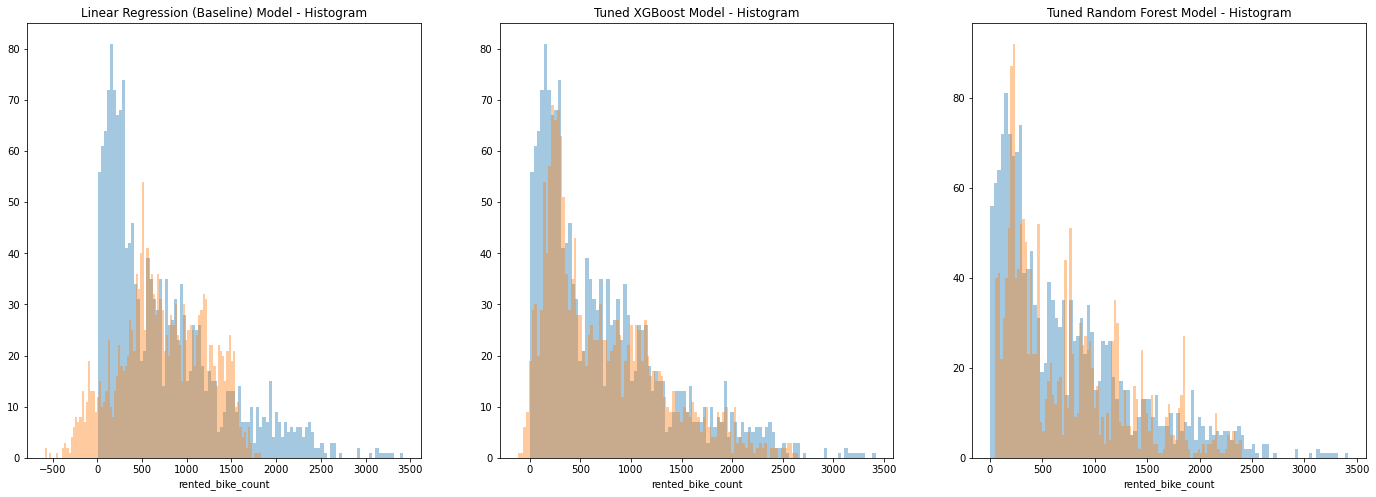

In [17]:
def display_dual_histograms():

    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (24, 8))

    for idx, model_info in enumerate([('Linear Regression (Baseline)', baseline), ('Tuned XGBoost', xgb), ('Tuned Random Forest', rf)]):

        model_name = model_info[0]
        model = model_info[1]

        for x in [y_val, model.predict(X_val)]:
            sns.distplot(x, bins = 100, ax=ax[idx], kde = False).set(title = f'{model_name} Model - Histogram')

    plt.show()

display_dual_histograms()